# 2) Salary_hike -> Build a prediction model for Salary_hike


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded= files.upload()


Saving Salary_Data.csv to Salary_Data.csv


In [3]:
salhike = pd.read_csv('Salary_Data.csv')
salhike

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<ipython-input-4-4b7a496a5293>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salhike['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

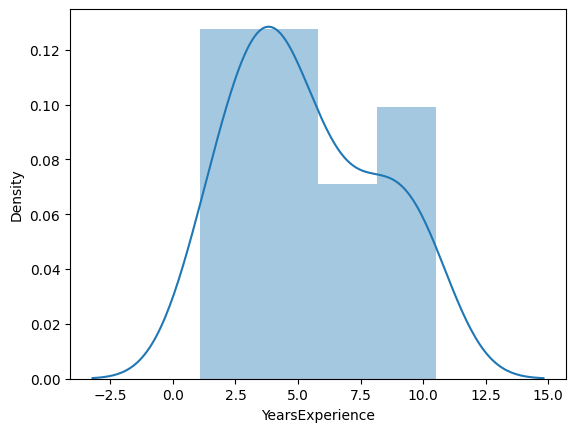

In [4]:
sns.distplot(salhike['YearsExperience'])

<ipython-input-5-b0e8ce61892d>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x= 'YearsExperience', y= 'Salary',data= salhike, palette= 'set1')


<Axes: xlabel='YearsExperience', ylabel='Salary'>

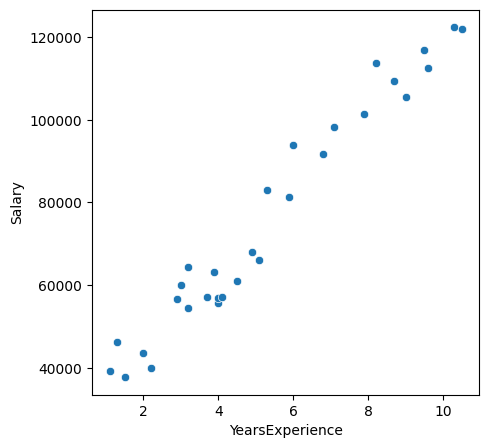

In [5]:
plt.figure(figsize=(5,5))
sns.scatterplot(x= 'YearsExperience', y= 'Salary',data= salhike, palette= 'set1')

In [6]:
salhike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [7]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience", data = salhike).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

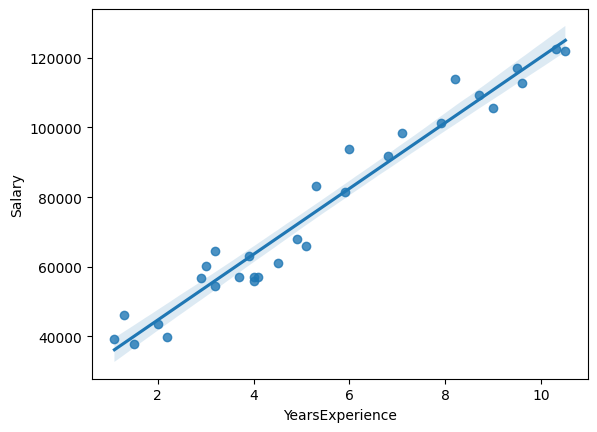

In [8]:
sns.regplot(x= "YearsExperience", y = "Salary", data = salhike)

In [9]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [10]:
salhike['Predicted_Sal_Hike'] = model.fittedvalues
salhike.head()

,YearsExperience,Salary,Predicted_Sal_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


In [11]:
salhike['Errors_Sq']=model.resid**2
salhike.head()

,YearsExperience,Salary,Predicted_Sal_Hike,Errors_Sq
0,1.1,39343.0,36187.158752,9.959334e+06
1,1.3,46205.0,38077.151217,6.606193e+07
2,1.5,37731.0,39967.143681,5.000339e+06
3,2.0,43525.0,44692.124842,1.362180e+06
4,2.2,39891.0,46582.117306,4.477105e+07


In [12]:
Mean_Squared_Error=salhike['Errors_Sq'].mean()
Mean_Squared_Error

31270951.72228097

In [13]:
RMSE = np.sqrt(Mean_Squared_Error)
RMSE

5592.043608760662

In [14]:
model.summary() # R-squared = 0.957

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 05 May 2023   Prob (F-statistic):           1.14e-20
Time:                        09:53:49   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log Transformation

In [15]:
salhike['Log_YearsExperience'] = np.log(salhike['YearsExperience'])
salhike.head()

,YearsExperience,Salary,Predicted_Sal_Hike,Errors_Sq,Log_YearsExperience
0,1.1,39343.0,36187.158752,9.959334e+06,0.095310
1,1.3,46205.0,38077.151217,6.606193e+07,0.262364
2,1.5,37731.0,39967.143681,5.000339e+06,0.405465
3,2.0,43525.0,44692.124842,1.362180e+06,0.693147
4,2.2,39891.0,46582.117306,4.477105e+07,0.788457


<ipython-input-16-71f4e7257358>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salhike['Log_YearsExperience'])


<Axes: xlabel='Log_YearsExperience', ylabel='Density'>

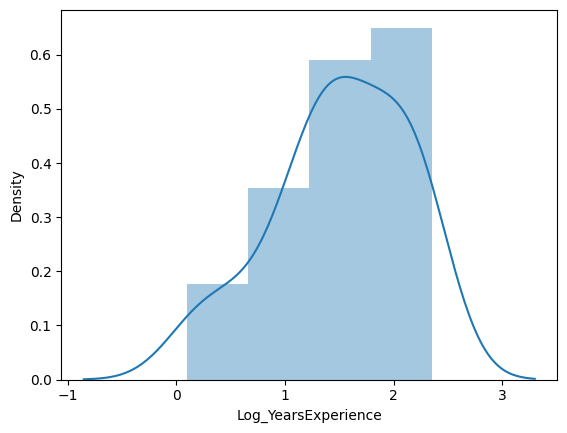

In [16]:
sns.distplot(salhike['Log_YearsExperience'])

In [17]:
Log_model=smf.ols("Salary~Log_YearsExperience",data=salhike).fit()

<Axes: xlabel='Log_YearsExperience', ylabel='Salary'>

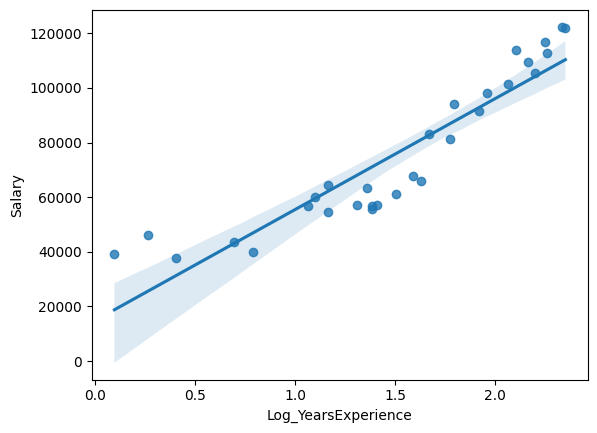

In [18]:
sns.regplot(x='Log_YearsExperience',y='Salary',data=salhike)

In [19]:
salhike['Log_Errors_Sq']=Log_model.resid**2
salhike[0:4]

,YearsExperience,Salary,Predicted_Sal_Hike,Errors_Sq,Log_YearsExperience,Log_Errors_Sq
0,1.1,39343.0,36187.158752,9.959334e+06,0.095310,4.221854e+08
1,1.3,46205.0,38077.151217,6.606193e+07,0.262364,4.255872e+08
2,1.5,37731.0,39967.143681,5.000339e+06,0.405465,4.030279e+07
3,2.0,43525.0,44692.124842,1.362180e+06,0.693147,2.187786e+05


In [20]:
Log_Mean_Squared_Error=salhike['Log_Errors_Sq'].mean()
Log_Mean_Squared_Error

106149618.72183882

In [21]:
Log_RMSE=np.sqrt(Log_Mean_Squared_Error)
Log_RMSE

10302.893706228306

In [22]:
Log_model.summary() # R-squared = 0.854

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 05 May 2023   Prob (F-statistic):           3.25e-13
Time:                        09:53:51   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
Log_YearsExperience  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# SQRT Transformation

In [23]:
salhike['SQRT_YearsExperience'] = np.sqrt(salhike['YearsExperience'])
salhike.head()

,YearsExperience,Salary,Predicted_Sal_Hike,Errors_Sq,Log_YearsExperience,Log_Errors_Sq,SQRT_YearsExperience
0,1.1,39343.0,36187.158752,9.959334e+06,0.095310,4.221854e+08,1.048809
1,1.3,46205.0,38077.151217,6.606193e+07,0.262364,4.255872e+08,1.140175
2,1.5,37731.0,39967.143681,5.000339e+06,0.405465,4.030279e+07,1.224745
3,2.0,43525.0,44692.124842,1.362180e+06,0.693147,2.187786e+05,1.414214
4,2.2,39891.0,46582.117306,4.477105e+07,0.788457,4.947911e+07,1.483240


<ipython-input-24-c590046fc0c8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salhike['SQRT_YearsExperience'])


<Axes: xlabel='SQRT_YearsExperience', ylabel='Density'>

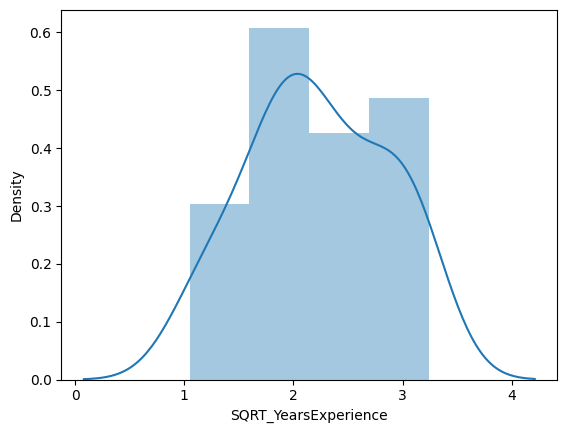

In [24]:
sns.distplot(salhike['SQRT_YearsExperience'])

In [25]:
SQRT_model=smf.ols("Salary~SQRT_YearsExperience",data=salhike).fit()

<Axes: xlabel='SQRT_YearsExperience', ylabel='Salary'>

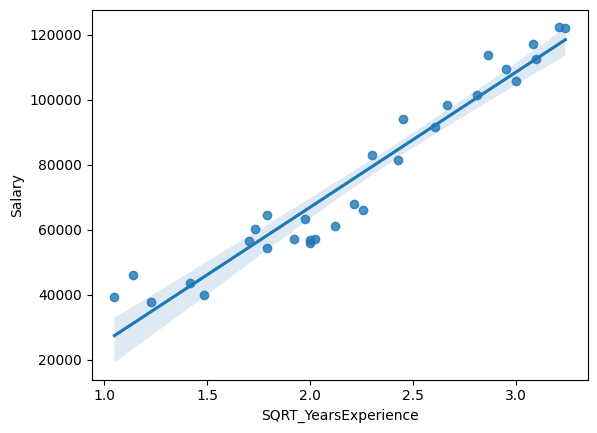

In [26]:
sns.regplot(x='SQRT_YearsExperience',y='Salary',data=salhike)

In [27]:
salhike['SQRT_Errors_Sq']=SQRT_model.resid**2
salhike.head()

,YearsExperience,Salary,Predicted_Sal_Hike,Errors_Sq,Log_YearsExperience,Log_Errors_Sq,SQRT_YearsExperience,SQRT_Errors_Sq
0,1.1,39343.0,36187.158752,9.959334e+06,0.095310,4.221854e+08,1.048809,1.409560e+08
1,1.3,46205.0,38077.151217,6.606193e+07,0.262364,4.255872e+08,1.140175,2.232847e+08
2,1.5,37731.0,39967.143681,5.000339e+06,0.405465,4.030279e+07,1.224745,8.755820e+06
3,2.0,43525.0,44692.124842,1.362180e+06,0.693147,2.187786e+05,1.414214,7.919999e+05
4,2.2,39891.0,46582.117306,4.477105e+07,0.788457,4.947911e+07,1.483240,3.145738e+07


In [28]:
SQRT_Mean_Squared_Error=salhike['SQRT_Errors_Sq'].mean()
SQRT_Mean_Squared_Error

50127755.61652503

In [29]:
SQRT_RMSE=np.sqrt(SQRT_Mean_Squared_Error)
SQRT_RMSE

7080.09573498304

In [30]:
SQRT_model.summary() # R-squared = 0.931

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Fri, 05 May 2023   Prob (F-statistic):           8.57e-18
Time:                        09:53:52   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
SQRT_YearsExperience   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Exponential Transformation

In [31]:
salhike['Exp_YearsExperience'] = np.exp(salhike['YearsExperience'])
salhike.head()

,YearsExperience,Salary,Predicted_Sal_Hike,Errors_Sq,Log_YearsExperience,Log_Errors_Sq,SQRT_YearsExperience,SQRT_Errors_Sq,Exp_YearsExperience
0,1.1,39343.0,36187.158752,9.959334e+06,0.095310,4.221854e+08,1.048809,1.409560e+08,3.004166
1,1.3,46205.0,38077.151217,6.606193e+07,0.262364,4.255872e+08,1.140175,2.232847e+08,3.669297
2,1.5,37731.0,39967.143681,5.000339e+06,0.405465,4.030279e+07,1.224745,8.755820e+06,4.481689
3,2.0,43525.0,44692.124842,1.362180e+06,0.693147,2.187786e+05,1.414214,7.919999e+05,7.389056
4,2.2,39891.0,46582.117306,4.477105e+07,0.788457,4.947911e+07,1.483240,3.145738e+07,9.025013


<ipython-input-32-61426f2310a8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salhike['Exp_YearsExperience'])


<Axes: xlabel='Exp_YearsExperience', ylabel='Density'>

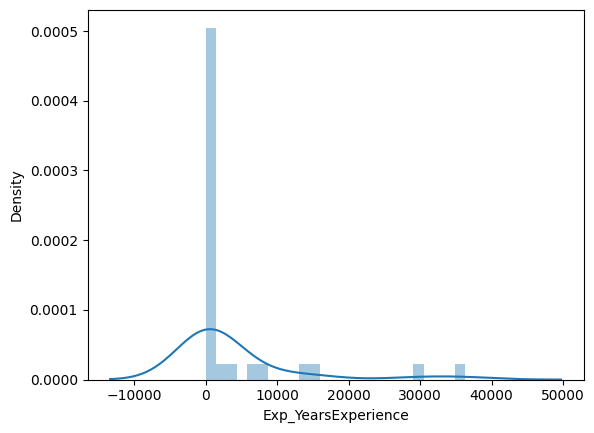

In [32]:
sns.distplot(salhike['Exp_YearsExperience'])

In [33]:
Exp_model=smf.ols("Salary~Exp_YearsExperience",data=salhike).fit()

<Axes: xlabel='Exp_YearsExperience', ylabel='Salary'>

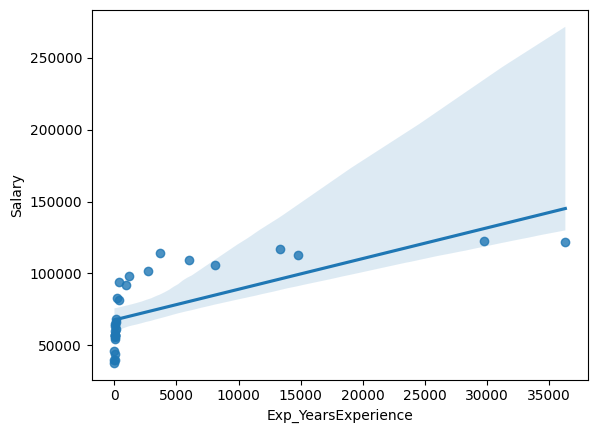

In [34]:
sns.regplot(x='Exp_YearsExperience',y='Salary',data=salhike)

In [35]:
salhike['Exp_Errors_Sq']=Exp_model.resid**2
salhike.head()

,YearsExperience,Salary,Predicted_Sal_Hike,Errors_Sq,Log_YearsExperience,Log_Errors_Sq,SQRT_YearsExperience,SQRT_Errors_Sq,Exp_YearsExperience,Exp_Errors_Sq
0,1.1,39343.0,36187.158752,9.959334e+06,0.095310,4.221854e+08,1.048809,1.409560e+08,3.004166,7.970482e+08
1,1.3,46205.0,38077.151217,6.606193e+07,0.262364,4.255872e+08,1.140175,2.232847e+08,3.669297,4.567394e+08
2,1.5,37731.0,39967.143681,5.000339e+06,0.405465,4.030279e+07,1.224745,8.755820e+06,4.481689,8.908552e+08
3,2.0,43525.0,44692.124842,1.362180e+06,0.693147,2.187786e+05,1.414214,7.919999e+05,7.389056,5.788551e+08
4,2.2,39891.0,46582.117306,4.477105e+07,0.788457,4.947911e+07,1.483240,3.145738e+07,9.025013,7.671184e+08


In [36]:
Exp_Mean_Squared_Error=salhike['Exp_Errors_Sq'].mean()
Exp_Mean_Squared_Error

383312339.8052995

In [37]:
Exp_RMSE=np.sqrt(Exp_Mean_Squared_Error)
Exp_RMSE

19578.364073775407

In [38]:
Exp_model.summary() # R-squared = 0.472

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Fri, 05 May 2023   Prob (F-statistic):           2.72e-05
Time:                        09:53:53   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            6.757e+04   4065.396     16.620      0.000    5.92e+04    7.59e+04
Exp_YearsExperience     2.1360      0.427      5.007      0.000       1.262       3.010
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                1.966
Skew:                           0.276   Prob(JB):                        0.374
Kurtosis:                       1.874   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model without any transformation is having the highest R -squared value (0.957).

# Prediction for First model

In [39]:
newdata=pd.Series([10.1,10.5,11,11.5,11.7])
newdata

0    10.1
1    10.5
2    11.0
3    11.5
4    11.7
dtype: float64

In [42]:
newpredict=pd.DataFrame(newdata,columns=['YearsExperience'])
newpredict

,YearsExperience
0,10.1
1,10.5
2,11.0
3,11.5
4,11.7


In [43]:
newpredict['predicted']=model.predict(newpredict)
newpredict

,YearsExperience,predicted
0,10.1,121236.819645
1,10.5,125016.804574
2,11.0,129741.785735
3,11.5,134466.766895
4,11.7,136356.759360
